In [1]:
#Veri setlerini alt dallara ayıracağız
#Karar ağaçlarıyla..

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [62]:
hit = pd.read_csv('Hitters.csv')
df=hit.copy()
df=df.dropna()
ms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df['Salary']
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,ms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [63]:
#Önce tek değişkenle deniyoruz.
#X_train=pd.DataFrame(X_train['Hits'])
#X_test=pd.DataFrame(X_test['Hits'])

In [20]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=7)

In [21]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

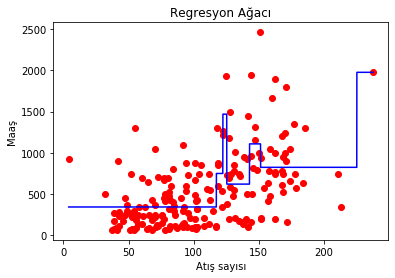

In [22]:
X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_grid,cart_model.predict(X_grid),color='blue')
plt.title('Regresyon Ağacı')
plt.xlabel('Atış sayısı')
plt.ylabel('Maaş');

In [25]:
#kural seti böyle kuruluyor 

In [30]:
#bunu hallet deli dehşet önemli ve çok sexy
#from skompiler import skompile
#print(skompile(cart_model.predict).to('python/code'))

In [34]:
np.sqrt(mean_squared_error(cart_model.predict(X_test),y_test))

482.6932542288411

In [35]:
#Tuning comes <333

In [48]:
cart_dummy_model = DecisionTreeRegressor()
cart_dummy_model.fit(X_train,y_train)
y_pred= cart_dummy_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

468.49579052913884

In [50]:
params={'min_samples_split':range(2,100),
       'max_leaf_nodes':range(2,10)}

In [51]:
cart_cv_model=GridSearchCV(cart_dummy_model,params,cv=10)

In [53]:
cart_cv_model.fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [54]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [59]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76)
cart_tuned.fit(X_train,y_train)
predictedtuned=cart_tuned.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(predictedtuned,y_test))

423.406689243066

In [61]:
#yukarıdan tek değişkeni iptal ediyorum
#bakalım o zaman nasıl çalışıyor.

In [68]:
cart_cv_model=GridSearchCV(cart_dummy_model,params,cv=10).fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [70]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=37)
cart_tuned.fit(X_train,y_train)
predictedtuned=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(predictedtuned,y_test))

376.39788207109865

In [ ]:
#Süper bir test hatası! Allahu ekber woohoooo